# custom threshold creation

In [14]:
import numpy as np
import json
import json
import matplotlib.pyplot as plt

1. import data from pred_segments
2. get list of [confidence scores, right prediction?] for each specie
3. apply logistic regression for these values
   1. the idea is to understand for which threshold we have a right prediction

In [31]:
with open("utils/conf_scores.json", "r") as f:
    conf_scores = json.load(f)

conf_scores

{'Certhia familiaris_Eurasian Treecreeper': [[0.7470152974128723, True],
  [0.9317041039466858, True],
  [0.4906557500362396, True],
  [0.9317041039466858, True],
  [0.4906557500362396, True],
  [0.7470152974128723, True],
  [0.7011784315109253, True]],
 'Dendrocopos major_Great Spotted Woodpecker': [[0.3191203773021698, True],
  [0.30091243982315063, True],
  [0.9952749013900757, True],
  [0.9887209534645081, True],
  [0.20544835925102234, True],
  [0.9888305068016052, True],
  [0.9686540365219116, True],
  [0.8234075903892517, True],
  [0.15064790844917297, False],
  [0.2574675977230072, True],
  [0.14039060473442078, True],
  [0.5191431641578674, True],
  [0.5134836435317993, True],
  [0.27169907093048096, True],
  [0.16490480303764343, True],
  [0.1273183971643448, False],
  [0.9949222207069397, True],
  [0.991265594959259, True],
  [0.22464482486248016, True],
  [0.9818111062049866, True],
  [0.9326425790786743, True],
  [0.6917914152145386, True],
  [0.18406547605991364, False],


In [32]:
conf_scores["Certhia familiaris_Eurasian Treecreeper"]

[[0.7470152974128723, True],
 [0.9317041039466858, True],
 [0.4906557500362396, True],
 [0.9317041039466858, True],
 [0.4906557500362396, True],
 [0.7470152974128723, True],
 [0.7011784315109253, True]]

In [33]:
from sklearn.metrics import precision_recall_fscore_support

best_threshold_by_species = {}
for specie, data in conf_scores.items():
    if len(data) == 0:
        print(f"Skipped specie: {specie} with {len(data)} samples")
        continue
    scores = np.array([x[0] for x in data])
    labels = np.array([x[1] for x in data])

    best_threshold = 0
    best_f1 = 0
    thresholds = np.linspace(scores.min(), scores.max(), 100)  # 50 soglie testate

    for threshold in thresholds:
        preds = scores >= threshold
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    best_threshold_by_species[specie] = best_threshold
    print(f"Soglia ottimale per {specie}: {best_threshold:.3f} con f1 score: {best_f1:.3f}")

Soglia ottimale per Certhia familiaris_Eurasian Treecreeper: 0.491 con f1 score: 1.000
Soglia ottimale per Dendrocopos major_Great Spotted Woodpecker: 0.159 con f1 score: 0.945
Soglia ottimale per Dryocopus martius_Black Woodpecker: 0.137 con f1 score: 1.000
Soglia ottimale per Erithacus rubecula_European Robin: 0.177 con f1 score: 0.844
Soglia ottimale per Fringilla coelebs_Common Chaffinch: 0.207 con f1 score: 0.647
Soglia ottimale per Lophophanes cristatus_Crested Tit: 0.911 con f1 score: 1.000
Soglia ottimale per Loxia curvirostra_Common Crossbill: 0.112 con f1 score: 0.658
Soglia ottimale per Muscicapa striata_Spotted Flycatcher: 0.189 con f1 score: 0.987
Soglia ottimale per Pecking_: 0.905 con f1 score: 0.714
Soglia ottimale per Periparus ater_Coal Tit: 0.167 con f1 score: 0.896
Soglia ottimale per Phylloscopus collybita_Common Chiffchaff: 0.100 con f1 score: 0.999
Skipped specie: Phylloscopus trochilus_Willow Warbler with 0 samples
Skipped specie: Poecile palustris_Marsh Tit wit

In [17]:
best_threshold_by_species

{'Certhia familiaris_Eurasian Treecreeper': 0.22091763504225798,
 'Dendrocopos major_Great Spotted Woodpecker': 0.11559316515922546,
 'Dryocopus martius_Black Woodpecker': 0.1147044375538826,
 'Erithacus rubecula_European Robin': 0.17526150833476672,
 'Fringilla coelebs_Common Chaffinch': 0.13203308174405434,
 'Lophophanes cristatus_Crested Tit': 0.9024355303157459,
 'Loxia curvirostra_Common Crossbill': 0.10169851779937744,
 'Muscicapa striata_Spotted Flycatcher': 0.18318963592702692,
 'Pecking_': 0.8297277670165506,
 'Periparus ater_Coal Tit': 0.155202459656831,
 'Phylloscopus collybita_Common Chiffchaff': 0.1000770777463913,
 'Rain_': 0.12149420847194363,
 'Regulus ignicapilla_Common Firecrest': 0.18158720569177106,
 'Regulus regulus_Goldcrest': 0.17051322592629325,
 'Sylvia atricapilla_Eurasian Blackcap': 0.2539976859333539,
 'Troglodytes troglodytes_Eurasian Wren': 0.18678416311740875,
 'Turdus merula_Eurasian Blackbird': 0.31324130296707153,
 'Turdus philomelos_Song Thrush': 0.23

In [ ]:
# save best thresholds
# with open("utils/best_threshold_by_species.json", "w") as f:
#     json.dump(best_threshold_by_species, f)

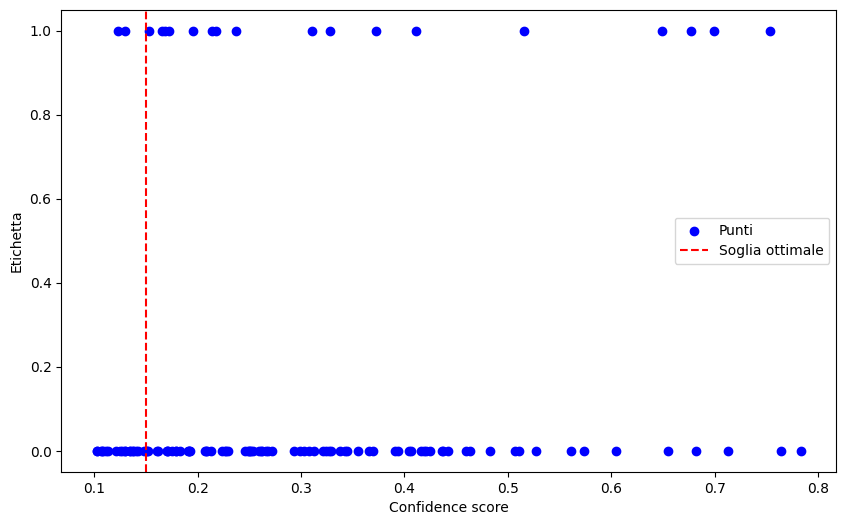

In [19]:
# visualize points with the best threshold
plt.figure(figsize=(10, 6))
plt.scatter(scores, labels, color="blue", label="Punti")
plt.axvline(x=best_threshold, color="red", linestyle="--", label="Soglia ottimale")
plt.xlabel("Confidence score")
plt.ylabel("Etichetta")
plt.legend()
plt.show()